In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
classes = pd.read_csv('elliptic_txs_classes.csv')
features = pd.read_csv('elliptic_txs_features.csv', header=None)
#features = features.rename(columns={1: "time step", 0:'txId'})
edgelist = pd.read_csv('elliptic_txs_edgelist.csv')

In [3]:
features.columns = ['txId', 'time_step'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
class_feature = pd.merge(features,classes,left_on="txId",right_on="txId",how='left')

In [4]:
unlabeled_data = class_feature[class_feature['class'] == "unknown"]
labeled_data = class_feature[class_feature['class'] != "unknown"]

In [5]:
tx_features = ["trans_feat_"+str(i) for i in range(93)]
agg_features = ["agg_feat_"+str(i) for i in range(72)]
X_unlabeled = unlabeled_data[tx_features + agg_features] 
X_labeled = labeled_data[tx_features + agg_features] 
y_labeled = labeled_data['class'] 

In [6]:
scaler = StandardScaler()
X_unlabeled = scaler.fit_transform(X_unlabeled)
X_labeled = scaler.transform(X_labeled)

Text(0, 0.5, 'cumulative explained variance')

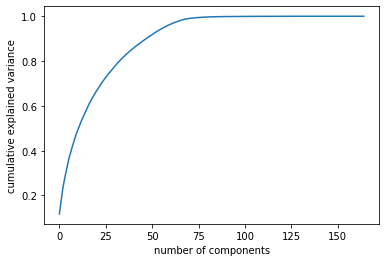

In [7]:
pca = PCA().fit(X_unlabeled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [8]:
n_components = 70
pca = PCA(n_components=n_components)
X_unlabeled_pca = pca.fit_transform(X_unlabeled)

In [9]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_unlabeled_pca)

/Users/zhuxiaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

No handles with labels found to put in legend.


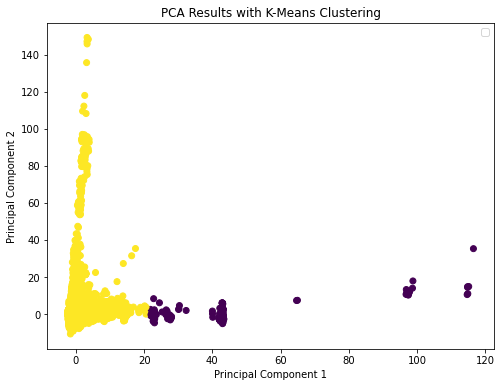

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_unlabeled_pca[:, 0], X_unlabeled_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("PCA Results with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [14]:
X_labeled_pca = pca.fit_transform(X_labeled)
y_predict = kmeans.predict(X_labeled_pca)

In [19]:
y_labeled = labeled_data['class'] 
y_labeled = y_labeled.apply(lambda x: 1 if x == '2' else 0 )

In [20]:
y_labeled

3         1
9         1
10        1
11        1
16        1
         ..
203752    1
203754    1
203759    0
203763    1
203766    0
Name: class, Length: 46564, dtype: int64

In [21]:
accuracy = accuracy_score(y_labeled, y_predict)
print(f"Accuracy on Labeled Data: {accuracy:.2f}")

Accuracy on Labeled Data: 0.86
